## <div align="center"> Walmart Sales Prediction </div>
### <div align="center"> Adrianus Ezeekiel Dyarsa Amarta </div>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
import shap

In [2]:
df = pd.read_csv('C:\\Users\\Adrianus Ezeekiel\\Documents\\Portfolio\\Walmart Prediction\\Walmart_Sales.csv')

print(df.head())

print(df.info())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [4]:
print(df.describe())
print(df.isnull().sum())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


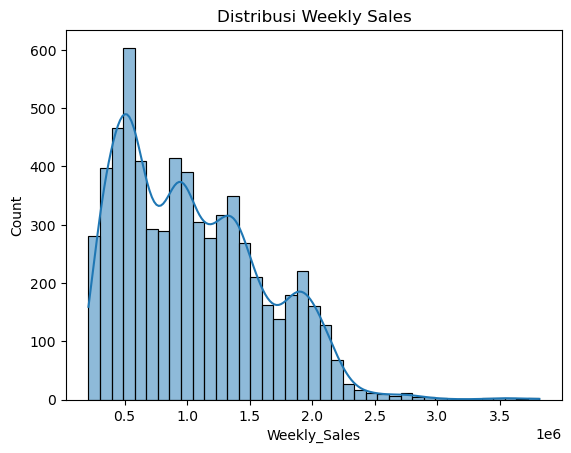

In [6]:
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Distribusi Weekly Sales')
plt.show()


In [8]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract additional time-related features (Year, Month, Weekday)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

# Display the processed data to confirm changes
df_processed_head = df.head()
df_processed_head

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Weekday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4


In [23]:
# Define features (X) and target (y)
X = df.drop(columns=['Weekly_Sales', 'Date'])
y = np.log1p(df['Weekly_Sales'])  # Apply log transformation to target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (5148, 9), Testing set: (1287, 9)


In [10]:
# Define features (X) and target (y)
X = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [25]:
# Make predictions
y_pred = model.predict(X_test)

# Reverse log transformation for interpretation
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

In [21]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 72238.02602859364
RMSE: 19431550820.649246
R² Score: 0.9396825221373426


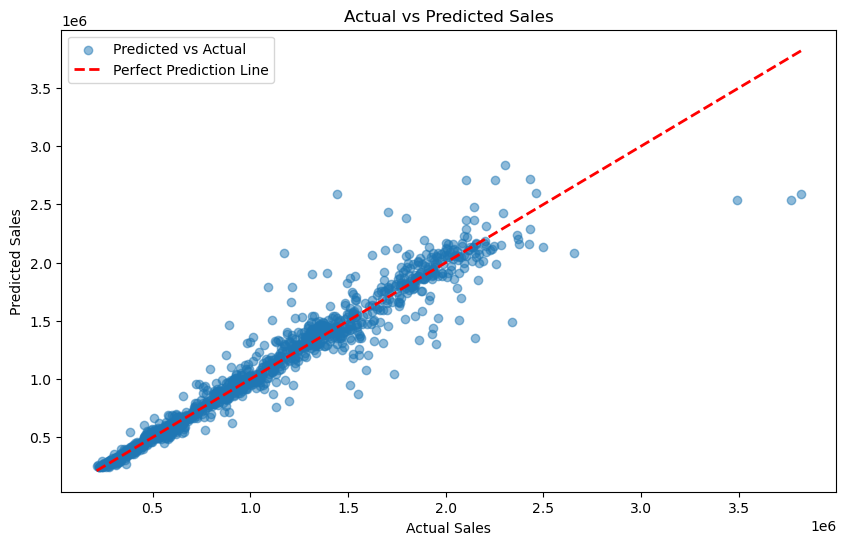

In [18]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

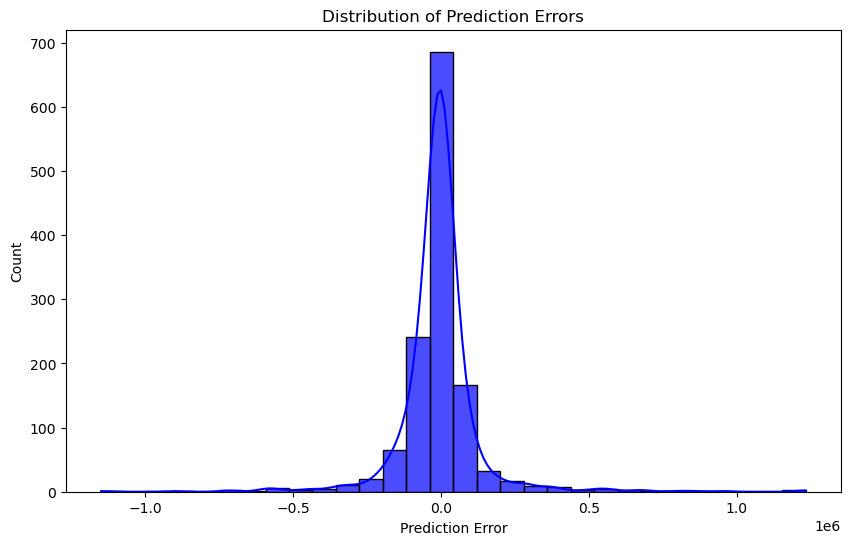

In [15]:
# Plot error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue', alpha=0.7)
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.show()

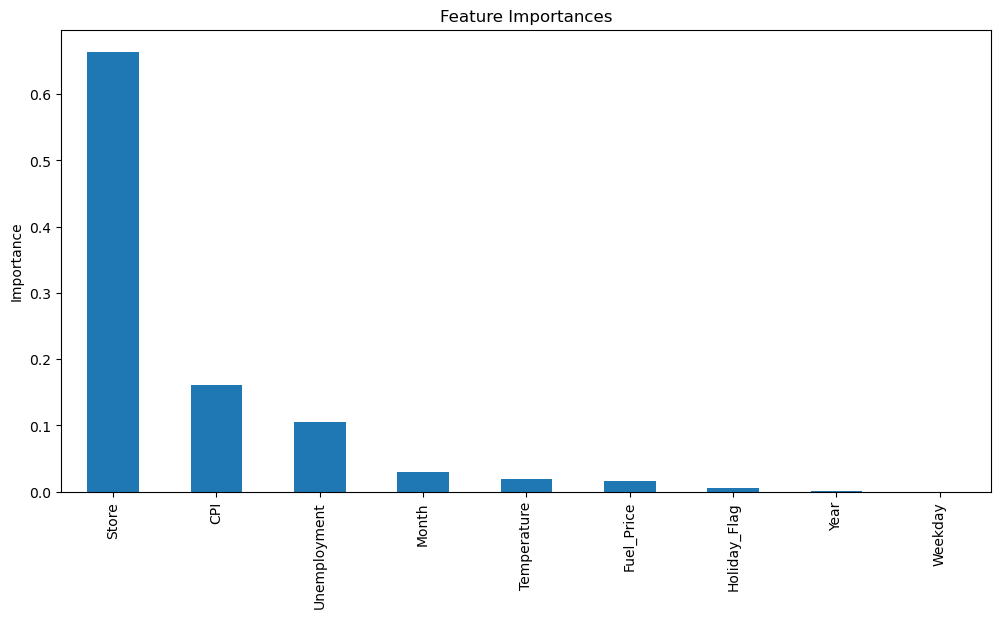

In [16]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sorted_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.show()

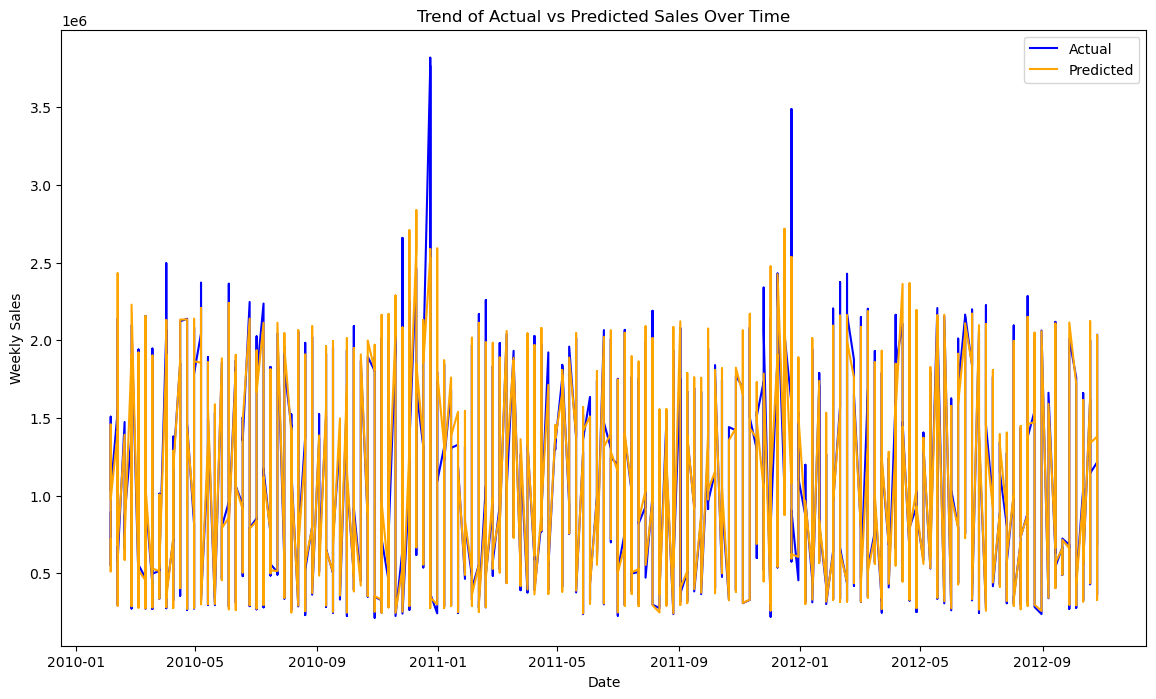

In [17]:
# Trend analysis: Actual vs Predicted over time
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Date": df.loc[y_test.index, 'Date']})
predictions = predictions.sort_values(by="Date")
plt.figure(figsize=(14, 8))
plt.plot(predictions['Date'], predictions['Actual'], label="Actual", color='blue')
plt.plot(predictions['Date'], predictions['Predicted'], label="Predicted", color='orange')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Trend of Actual vs Predicted Sales Over Time")
plt.legend()
plt.show()

In [27]:
# Cross-validation evaluation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"Cross-validated RMSE: {cv_rmse}")

Cross-validated RMSE: 0.7340012556881567


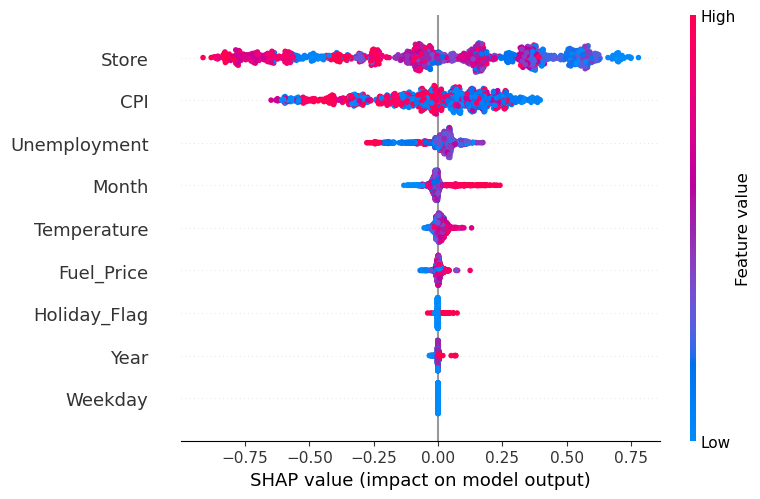

In [30]:
# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [31]:
# 1. Predictions Dataset
predictions_df = pd.DataFrame({
    'Date': df.loc[y_test.index, 'Date'],
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': y_test - y_pred
})
# Gabungkan dengan fitur lainnya
predictions_df = predictions_df.merge(df, left_index=True, right_index=True)
predictions_df.to_csv('predictions.csv', index=False)

# 2. Feature Importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances_df.to_csv('feature_importances.csv', index=False)

# 3. Summary Metrics
metrics_summary = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Value': [rmse, r2]
})
metrics_summary.to_csv('metrics_summary.csv', index=False)